<a href="https://colab.research.google.com/github/ale29ruf/Progetto_Data_Mining/blob/main/ProgettoACI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Parte in cui descriviamo il dataset, le features e il loro significato, il numero di istanze.

Il obiettivo in termini predittivi è determinare se una persona guadagna oltre $50K all'anno.

Come prima operazione importiamo il dataset.

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult.csv


In [2]:
# Supponiamo che il file caricato si chiami 'nomeFile.csv' (controllare nella sezione File a sinistra)
data = pd.read_csv('adult.csv')

Al fine di valutare la qualità del dataset, si è fatto uso di due metodi molto generali: "describe()" e "info()". Il primo fornisce una sintesi statistica del dataset, il secondo invece fornisce informazioni sulla tipologia di dati che costituisce il datase, utile per individuare la presenza di valori mancanti.

In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


E' possibile osservare che nessuna istanza contiene valori di feature nulli.

## Data Cleaning and Preparation

In questa sezione eseguiremo alcune operazioni preliminarie ma molto significative, quali cleaning, trasformazioni e altro, se necessarie, in modo da rendere il dataset significativo per l'esecuzione dei modelli.

### Gestire dati mancanti

In [5]:
nulls = data.isnull()
nulls.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Sembra non esserci alcun dato mancante quindi possiamo saltare la parte di filtraggio delle corrispettive istanze.

### Rimozione di istanze duplicate

Ci sono svariati motivi per cui un dataset possa contenere duplicati, ad esempio se è ottenuto attraverso il marging di più dataset.   
A tal proposito si fa uso del metodo "duplicated()" di Pandas che restituisce true per un'istanza se è un duplicato di un'altra istanza, cioè se esiste un'altra istanza con diverso indice tale per cui ogni valore per colonna risulta essere uguale.

In [6]:
duplicated = data.duplicated() # return a mask
duplicated.describe()

# Visualizzo eventualmente le istanze duplicate
#duplicate_rows = data[duplicated]
#print(duplicate_rows)

count     32561
unique        2
top       False
freq      32537
dtype: object

Notiamo che 32537/32561 istanze hanno valore False, ciò significa che 24 istanze sono duplicate. Procediamo con la rimozione di queste.

In [7]:
new_data = data.drop_duplicates()
duplicated = new_data.duplicated()
duplicated.describe()

count     32537
unique        1
top       False
freq      32537
dtype: object

Notiamo che a questo punto ogni istanza ha valore a True.

#### Trasformazione del dataset

Ci vogliamo assicurare che i valori delle feature categoriche siano effettivamente quelli presenti nelle varie istanze, evitando situazioni di inconsistenza dovute a lettere minuscole o maiuscole, spazi o altro.   
Ovviamente come riferimento si considerano le informazioni fornite da coloro che hanno caricato il dataset.  
Si visualizza in prima battuta tutte le distribuzioni delle feature categoriche.

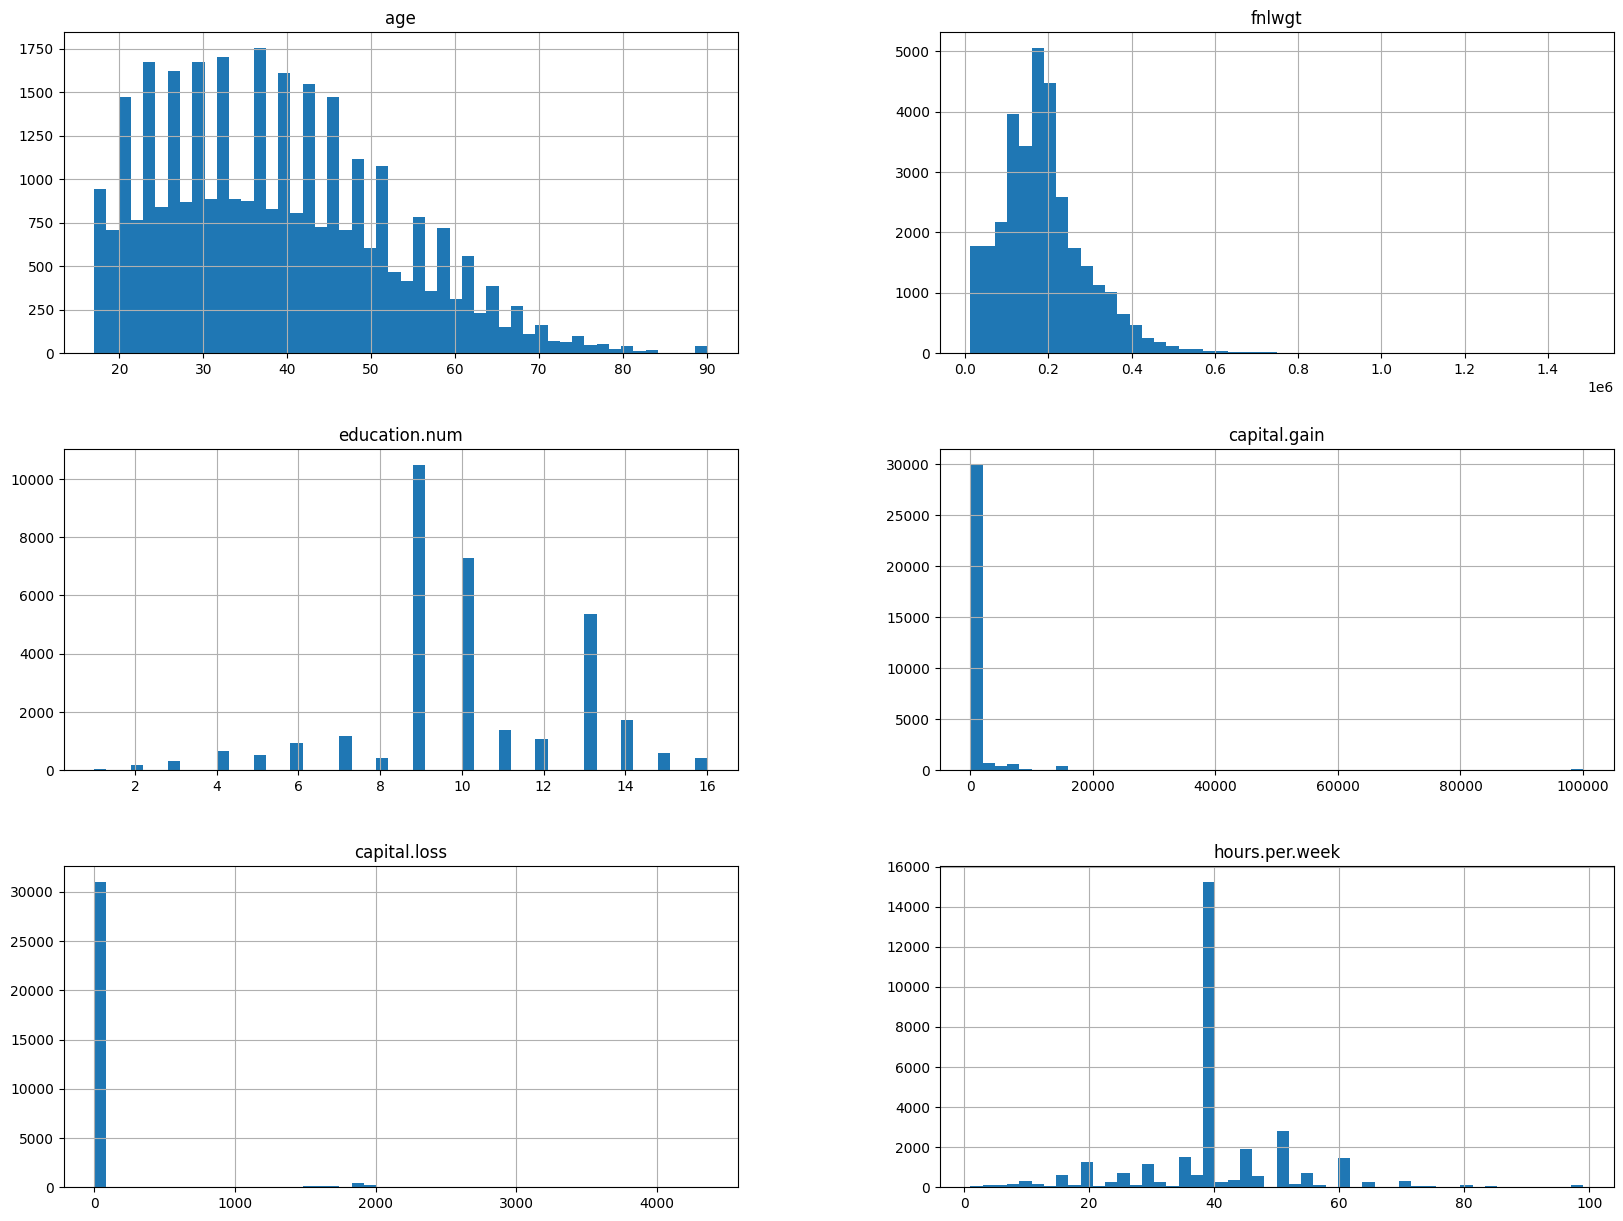

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
new_data.hist(bins=50, figsize=(20,15))
plt.show()

La featuer "fnlwgt" è da considerarsi come un peso relativo alla significatività dell'istanza nei confronti della variabile target.
Non sembra esserci alcun valore anomalo. <br>
Sarebbe interessante capire:
1.   le persone quasi novantenni che lavorano
2.   le persone che lavorano quasi 100 ore a settimana

### Analisi delle persone over age che lavorano
Se "final weight" misura effettivamente il peso dell'istanza nei confronti di "income", verifichiamo a cosa corrispondono le istanze che hanno un valore di fnlwgt maggiore di 1.

In [29]:
tmp = new_data[new_data['fnlwgt']/1000000>1]
tmp.count()

age               13
workclass         13
fnlwgt            13
education         13
education.num     13
marital.status    13
occupation        13
relationship      13
race              13
sex               13
capital.gain      13
capital.loss      13
hours.per.week    13
native.country    13
income            13
dtype: int64

In [31]:
new_data = new_data[new_data['fnlwgt']/1000000<=1]

Dato che sono solo 13, si è deciso di rimuoverle. <br>
A questo punto consideriamo le persone over age che lavorano. Attualmente l'età media di ritiro dalla vita lavorativa è di 64 anni per gli uomini e di 62 anni per le donne. <br>
E' bene verificare prima alcune cose:
1. La variabile "age" influenza molto la variabile target?
2. Quanto vale il corrispettivo fnlwgt per le tuple che si vuole eliminare?
3. La distribuzione della variabile target risente di uno sbilanciamento?

E' importante sapere che **'fnlwgt' è un peso statistico** **assegnato a ciascuna istanza in un dataset demografico per garantire che il campione estratto rappresenti accuratamente la popolazione di interesse**. Questo peso è calcolato utilizzando metodi avanzati di campionamento e stratificazione per garantire che l'analisi dei dati rifletta in modo equo la diversità della popolazione.

In [ ]:
# Per l'analisi di correlazione eseguo prima la codifica one hot almeno sulla variabile target
one_hot_income = pd.get_dummies(new_data['income'])
new_data = pd.concat([new_data, one_hot_income], axis=1)
new_data = new_data.drop('income', axis=1)
new_data.head()

In [60]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335166
age              -0.234051
hours.per.week   -0.229543
capital.gain     -0.223319
capital.loss     -0.150529
fnlwgt            0.009432
<=50K             1.000000
Name: <=50K, dtype: float64

In [61]:
corr_matrix[">50K"].sort_values()

<=50K            -1.000000
fnlwgt           -0.009432
capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
>50K              1.000000
Name: >50K, dtype: float64

Sicuramente la feature "age" ha una buona correlazione nello spiegare la variabile target, se paragonata alle altre. Valutiamo il valore di "fnlwgt" medio per capire se le istanze sono molto rappresentative della popolazione statistica.

In [69]:
filtered_data = new_data[new_data['age'] > 80]
filtered_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,85.857143,164142.897959,9.306122,1104.744898,177.091837,29.500000
std,3.895543,85082.897239,3.462340,3866.306691,745.408600,18.387159
min,81.000000,29441.000000,2.000000,0.000000,0.000000,1.000000
25%,82.000000,99127.000000,9.000000,0.000000,0.000000,15.000000
50%,85.000000,151030.000000,9.000000,0.000000,0.000000,30.000000
75%,90.000000,212066.250000,13.000000,0.000000,0.000000,40.000000
max,90.000000,403910.000000,15.000000,20051.000000,4356.000000,99.000000


Sembra che tutto sommato non sono poi così poco rilvenati dato che solo 98 tuple rappresentano mediamente il 16% della popolazione, considerando anche che l'intero campione è composto da 32524 istanze che dovrebbe rappresentare il restante 84%. <br>
Consideriamo invece come varia la variabile target nel caso in cui decidessimo di rimuovere queste tuple.

In [77]:
filtered_data = new_data[new_data['age'] < 80]

new_data_freq = new_data[['<=50K', '>50K']].sum()
filtered_data_freq = filtered_data[['<=50K', '>50K']].sum()
print("new_data")
print(new_data_freq)
print()
print("filtered_data")
print(filtered_data_freq)

new_data
<=50K    24688
>50K      7836
dtype: int64

filtered_data
<=50K    24584
>50K      7820
dtype: int64


Le distribuzioni rimarrebbero abbastanza inalterate. <br>
In questa prima fase esplorativa si è deciso comunque di mantenere le tuple all'interno del dataset.

### Analisi delle persone che lavorano troppe ore a settimana
L'obiettivo in questo caso è identificare le persone che lavorano troppe ore a settimana ed eventualemente considerarle come outlayer, e dunque rimuoverle.

## Analisi feature categoriche

In [9]:
import plotly.express as px

def plot_categorical_distributions_plotly(df, categorical_columns):
    for col in categorical_columns:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Categoria', 'Frequenza']  # Rinomina le colonne

        fig = px.bar(value_counts, x='Categoria', y='Frequenza', title=f'Distribuzione di {col}')
        fig.update_layout(xaxis_title='Categoria', yaxis_title='Frequenza')
        fig.show()

# Selezione di tutte le colonne categoriche
feature_categoriche = new_data.select_dtypes(include=['object'])
plot_categorical_distributions_plotly(new_data, feature_categoriche)

Si può osservare come il carattere speciale "?" venga usato per indicare un valore mancante. Visualizziamo il numero di tuple contenente questo carattere.

In [10]:
# Genero la maschera
contains_question = new_data.applymap(lambda x: x == "?")

# Conto il numero di righe che contengono almeno un "?"
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

print(num_tuples_with_question_mark)

2398


A questo punto è possibile o procedere con la rimozione delle istanze oppure con la sostituzione dei valori "?". Dal momento che il numero di istanze è relativamente basso, si è deciso di rimuoverle dal dataset.

In [11]:
cleaned_data = new_data[~contains_question.any(axis=1)]

contains_question = cleaned_data.applymap(lambda x: x == "?")
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

new_data = cleaned_data

print(num_tuples_with_question_mark)

0


### Permutazioni e campionamento casuale

In generale, i dataset possono essere caratterizzati da un ordinamento ben preciso, e questo comporta errori nella regressione o classificazione. Per risolvere questa problematica si effettua una permutazione delle tuple.

In [12]:
new_data = new_data.sample(new_data.shape[0])

In [14]:
new_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13117,34,Private,103651,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
9540,54,Private,339667,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,41,United-States,<=50K
17176,60,Private,223696,1st-4th,2,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
29475,25,Private,189897,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


### Analisi varie

Sarebbe interessante vedere come, a parità di livello di educazione raggiunta, come varia l'occupazione al variare dell'età. E' forse possibile che, essendo più giovani, è possibile raggiungere delle occupazioni più meritevoli rispetto ad essere più grandi?

Sarebbe altrettanto interessante vedere come, a parità di educatione, è possibile raggiungere occupazioni più meritevoli.
Oppure se l'educazione incide effettivamente sulle occupazioni che è possibile raggiungere.
Oppure se avere un'alta educazione consente di raggiungere occupazioni più alte ma in meno tempo rispetto ad avere un'educazione più bassa.


Iniziamo per prima cosa a visualizzare le varie distribuzioni per cercare di capire come variano.

In [15]:
new_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13117,34,Private,103651,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
9540,54,Private,339667,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,41,United-States,<=50K
17176,60,Private,223696,1st-4th,2,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
29475,25,Private,189897,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


<Axes: xlabel='age', ylabel='Count'>

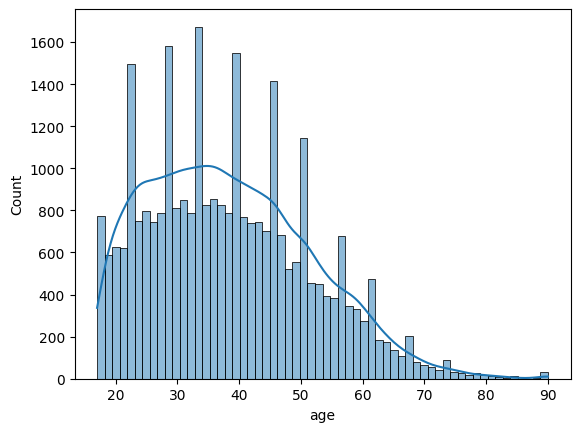

In [35]:
import seaborn as sns
sns.histplot(new_data['age'], kde=True)

Questo plot è abbastanza verosimile dal momento che, in genere, sono poche le persone che continuano a lavorare in tarda età, considerando che l'età media di pensionamento negli Stati Uniti è 62 anni.

In [36]:
value_counts = new_data['workclass'].value_counts().reset_index()
fig = px.bar(value_counts, x='workclass', y='count', title=f'Workclass')
fig.show()

La maggior parte delle persone lavora nel privato, quasi 2500 lavorano per se stessi, ma non hanno una propria struttura aziendale come una società. Il resto lavora nel governo locale (ruoli all'interno delle amministrazioni comunali, provinciali, ecc.), nel governo statale, possiede e gestisce la propria impresa (lavoro prevalentemente proprio e senza vincolo di subordinazione nei confronti di un committente), ed infine nel governo federale. Solo 14 dei lavoratori presenti nel dataset lavora senza essere pagato.

In [37]:
value_counts = new_data['education'].value_counts().reset_index()
fig = px.bar(value_counts, x='education', y='count', title=f'Education')
fig.show()

La maggior parte delle istanze si addensa tra "High-grad", paragonabile ad una nostra scuola media più liceo, e "college" che corrisponde ad un istituto superiore più pratico se paragonato al all'università italiana.

In [38]:
value_counts = new_data['education.num'].value_counts().reset_index()
fig = px.bar(value_counts, x='education.num', y='count', title=f'Education.num')
fig.show()

Questa feature rappresenta il numero di anni impiegati per raggiungere il livello di istruzione rappresentato precedentemente.

In [39]:
value_counts = new_data['marital.status'].value_counts().reset_index()
fig = px.bar(value_counts, x='marital.status', y='count', title=f'Marital.status')
fig.show()

La categoria “married-civ-spouse” si riferisce allo stato civile di una persona che è sposata e il coniuge è un civile, cioè non fa parte delle forze armate o non è un coniuge assente per motivi come il servizio militare. La categoria “married-AF-spouse” invece, fa riferimento a persone sposate con un coniuge che è nelle Forze Armate. La categoria “married-spouse-absent” si riferisce allo stato civile di una persona che è legalmente sposata, ma il coniuge è assente.

In [40]:
value_counts = new_data['occupation'].value_counts().reset_index()
fig = px.bar(value_counts, x='occupation', y='count', title=f'Occupation')
fig.show()

“Prof-speciality” si riferisce a professioni che richiedono un alto livello di specializzazione e competenza, come medici, avvocati, ingegneri, scienziati e professori universitari. “craft-repair” si riferisce a mestieri e lavori di riparazione. Ad esempio, potrebbe includere elettricisti, idraulici, meccanici, falegnami e altri mestieri simili. “exec-managerial” si riferisce a ruoli di gestione esecutiva e manageriale, come direttori generali, direttori di dipartimento, manager di progetto e altri ruoli simili. “adm-clerical” si riferisce a una categoria di professioni che include ruoli amministrativi e di segreteria, come impiegati, assistenti amministrativi, segretari e altri ruoli simili. “sales” si riferisce a ruoli che riguardano la vendita di prodotti o servizi. Ad esempio, potrebbe includere venditori, rappresentanti di vendita, direttori delle vendite e altri ruoli simili.  “machine-op-inspct” si riferisce a una categoria di professioni che include operatori di macchine e ispettori. “protective-serv” si riferisce a ruoli nel settore dei servizi di protezione, come poliziotti, vigili del fuoco, guardie di sicurezza e altri ruoli simili.  “priv-house-serv” si riferisce a una categoria di professioni che include ruoli di servizio domestico privato, come governanti, cuochi privati, maggiordomi e altri ruoli simili.

In [41]:
value_counts = new_data['relationship'].value_counts().reset_index()
fig = px.bar(value_counts, x='relationship', y='count', title=f'Relationship')
fig.show()

In [42]:
value_counts = new_data['sex'].value_counts().reset_index()
fig = px.bar(value_counts, x='sex', y='count', title=f'Sex')
fig.show()

Sciuramente il plot è concorde con quello precedente in cui la percentuale di "husband" è nettamente superiore a quella di "wife".

In [43]:
import plotly.express as px
import pandas as pd

value_counts = new_data['hours.per.week'].value_counts().reset_index()
value_counts.columns = ['hours.per.week', 'count']
value_counts = value_counts.sort_values(by='hours.per.week')

fig = px.bar(value_counts, x='hours.per.week', y='count', title='Hours.per.week')
fig.update_layout( yaxis_type="log", xaxis_title='Ore per settimana', yaxis_title='Conteggio (scala logaritmica)', bargap=0.5)
fig.show()


In [44]:
value_counts = new_data['native.country'].value_counts().reset_index()
fig = px.bar(value_counts, x='native.country', y='count', title=f'Native.country')
fig.show()

In [45]:
value_counts = new_data['income'].value_counts().reset_index()
fig = px.bar(value_counts, x='income', y='count', title=f'Income')
fig.show()

Si nota come il dataset risulta essere nettamente sbilanciato dal momento che poco più di 7500 feature risultano avere income meggiore di 50k contro le 22600 con income meggiore o uguale a 50k.

### Analisi interazioni tra feature

<ipython-input-46-79a3c4446ae3>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




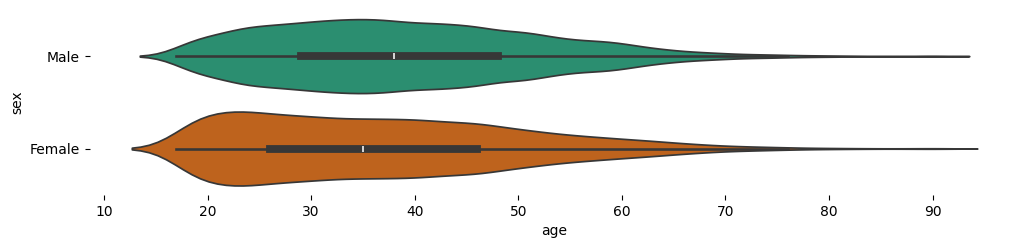

In [46]:
# @title sex vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data, x='age', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

E' possibile notare che più donne lavorano tra i 20 e i 30 anni rispetto agli uomini, tuttavia questi ultimi sono più persistenti con il tempo. La bombatura del grafico in verde infatti, si mantiene più costante al passare degli anni rispetto quella delle donne. A conferma di ciò anche il valore medio delle donne è più shiftato a sinistra rispetto a quello degli uomini.

Sarebbe interessante capire quali sono i lavori svolti dalle persone over 70 dal momento che l'età media di pensionamento negli USA è attorno ai 62.

In [47]:
filtered_data = new_data[new_data['age'] > 70]

# Calcolare i conteggi delle occupazioni raggruppate per workclass
occupation_workclass_counts = filtered_data.groupby(['occupation', 'workclass']).size().reset_index(name='count')

fig = px.bar(occupation_workclass_counts,
             x='occupation',
             y='count',
             color='workclass',
             title='Distribuzione delle Occupazioni per Persone con Età > 70 in base a Workclass',
             barmode='group')  # barmode='group' per barre raggruppate

fig.update_layout( xaxis_tickangle=-45, bargap=0.2)
fig.show()

Sicuramente i lavori che permettono ad un individuo di rimanere lavorare oltre l'età media di pensionamento rigurdano il settore privato, e in particolare, ad esclusione di "other-service", "prof-speciality" e "adm-clarical" che sono lavori più "stazionari" dato che non richiedono alcuna particolare capacità fisica. Altri lavori più manuali come "craft-repair" o addirittura "protective-serv" hanno un conteggio molto basso come ci aspettavamo.  

In [48]:
education_income_counts = new_data.groupby(['education', 'income']).size().reset_index(name='count')
fig = px.bar(education_income_counts,
             x='education',
             y='count',
             color='income',
             title='Distribuzione di Income in base a Education',
             barmode='group')

fig.update_layout(xaxis_title='Livello di istruzione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig.show()

In [49]:
education_num_income_counts = new_data.groupby(['education.num', 'income']).size().reset_index(name='count')

fig1 = px.bar(education_num_income_counts,
              x='education.num',
              y='count',
              color='income',
              title='Distribuzione di Income in base a Education.num',
              barmode='group')

fig1.update_layout(xaxis_title='Numero di anni di istruzione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig1.show()

Sembra possibile rimuovere una feature tra Education e Education.num dal momento che la seconda si estrae a partire dalla prima, o viceversa.

In [50]:
occupation_income_counts = new_data.groupby(['occupation', 'income']).size().reset_index(name='count')
fig2 = px.bar(occupation_income_counts,
              x='occupation',
              y='count',
              color='income',
              title='Distribuzione di Income in base a Occupation',
              barmode='group')
fig2.update_layout(xaxis_title='Occupazione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig2.show()

In [51]:
relationship_income_counts = new_data.groupby(['relationship', 'income']).size().reset_index(name='count')
fig3 = px.bar(relationship_income_counts,
              x='relationship',
              y='count',
              color='income',
              title='Distribuzione di Income in base a Relationship',
              barmode='group')
fig3.update_layout(xaxis_title='Relazione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig3.show()

In [52]:
hours_per_week_income_counts = new_data.groupby(['hours.per.week', 'income']).size().reset_index(name='count')
fig4 = px.bar(hours_per_week_income_counts,
              x='hours.per.week',
              y='count',
              color='income',
              title='Distribuzione di Income in base a Hours per Week',
              barmode='group')
fig4.update_layout(yaxis_type="log", xaxis_title='Ore lavorate per settimana', yaxis_title='Conteggio (scala logaritmica)', xaxis_tickangle=-45)
fig4.show()

L'obiettivo è comprendere quali sono le istanze che hanno un numero cosi elevato di ore lavorative a settimana.

In [53]:
new_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13117,34,Private,103651,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
9540,54,Private,339667,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,41,United-States,<=50K
17176,60,Private,223696,1st-4th,2,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
29475,25,Private,189897,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [55]:
data_1 = new_data[new_data['hours.per.week'] > 45]
data_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
12232,48,Federal-gov,156410,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,50,United-States,>50K
5362,30,Private,209103,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
19328,38,Private,436361,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,75,United-States,<=50K
17894,51,Private,176969,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,<=50K


<Figure size 1000x600 with 0 Axes>

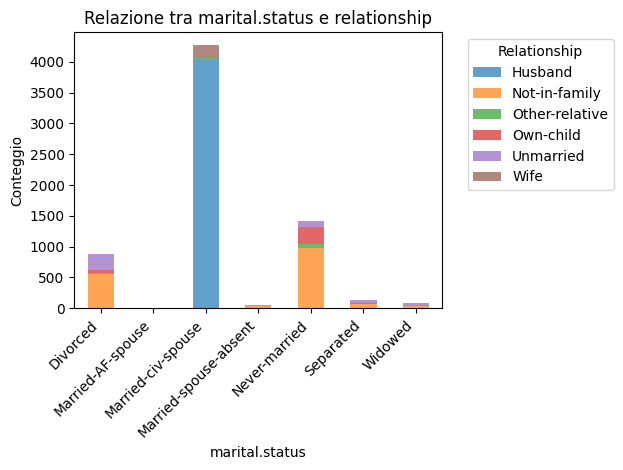

In [75]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['marital.status'], data_1['relationship'])

# Plot
plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('marital.status')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e relationship')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Sicuramente le persone che sono divorziate o che non sono mai sposate hanno la possibilità di concedersi molto più tempo per il lavoro. Quelli che invece sono sposati con un coniuge che ha un impiego civile costituiscono la maggior parte della percentuale, probabilmente legata al fatto che il loro partner riesce ad occuparsi degli altri impegni, dal momento che vivono comunque insieme.

In [76]:
data_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
12232,48,Federal-gov,156410,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,50,United-States,>50K
5362,30,Private,209103,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
19328,38,Private,436361,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,75,United-States,<=50K
17894,51,Private,176969,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,<=50K


<Figure size 1000x1000 with 0 Axes>

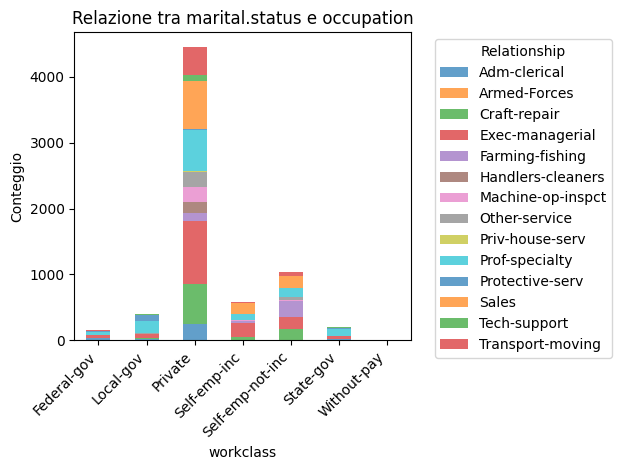

In [78]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['workclass'], data_1['occupation'])

# Plot
plt.figure(figsize=(10, 10))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('workclass')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e occupation')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

“Prof-speciality” si riferisce a professioni che richiedono un alto livello di specializzazione e competenza, come medici, avvocati, ingegneri, scienziati e professori universitari. “craft-repair” si riferisce a mestieri e lavori di riparazione. Ad esempio, potrebbe includere elettricisti, idraulici, meccanici, falegnami e altri mestieri simili. “exec-managerial” si riferisce a ruoli di gestione esecutiva e manageriale, come direttori generali, direttori di dipartimento, manager di progetto e altri ruoli simili. “adm-clerical” si riferisce a una categoria di professioni che include ruoli amministrativi e di segreteria, come impiegati, assistenti amministrativi, segretari e altri ruoli simili. “sales” si riferisce a ruoli che riguardano la vendita di prodotti o servizi. Ad esempio, potrebbe includere venditori, rappresentanti di vendita, direttori delle vendite e altri ruoli simili.  “machine-op-inspct” si riferisce a una categoria di professioni che include operatori di macchine e ispettori. “protective-serv” si riferisce a ruoli nel settore dei servizi di protezione, come poliziotti, vigili del fuoco, guardie di sicurezza e altri ruoli simili.  “priv-house-serv” si riferisce a una categoria di professioni che include ruoli di servizio domestico privato, come governanti, cuochi privati, maggiordomi e altri ruoli simili.
La maggior parte delle persone lavora nel "privato", quasi 2500 "lavorano per se stessi", ma non hanno una propria struttura aziendale come una società. Il resto lavora nel "governo locale" (ruoli all'interno delle amministrazioni comunali, provinciali, ecc.), nel "governo statale", "possiede e gestisce la propria impresa" (lavoro prevalentemente proprio e senza vincolo di subordinazione nei confronti di un committente), ed infine nel "governo federale". Solo 14 dei lavoratori presenti nel dataset lavora "senza essere pagato".

<ipython-input-86-cbb78ee35fc5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




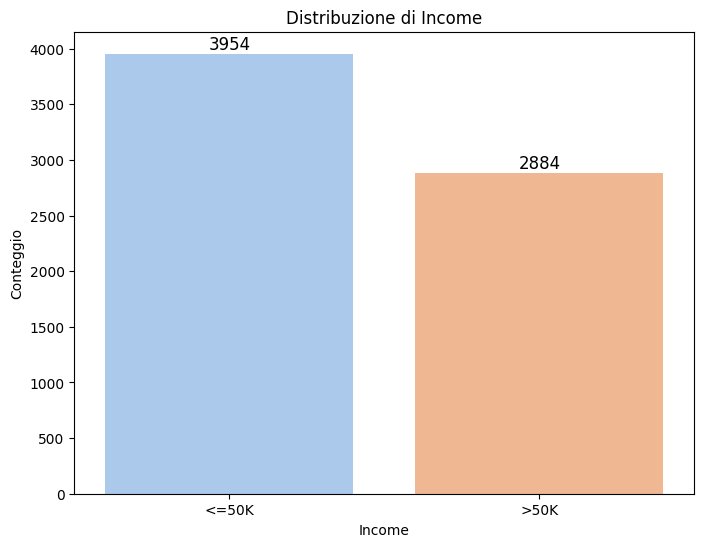

In [86]:
value_counts = data_1['income'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel')

# Aggiunta dei conteggi sopra le barre
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}', va='bottom', ha='center', fontsize=12, color='black')

plt.xlabel('Income')
plt.ylabel('Conteggio')
plt.title('Distribuzione di Income')

plt.show()

Si nota come la differenza sia abbastanza irrisoria, è solo di circa 1000 persone. Magari quelle 3954 sono in particolari condizioni sociali.

In [91]:
data_1 = data_1[data_1['income'] == "<=50K"]
data_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24694,49,Local-gov,123088,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,46,United-States,<=50K
5362,30,Private,209103,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
19328,38,Private,436361,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,75,United-States,<=50K
17894,51,Private,176969,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,<=50K
28199,23,Private,228230,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,47,United-States,<=50K


<Figure size 1000x600 with 0 Axes>

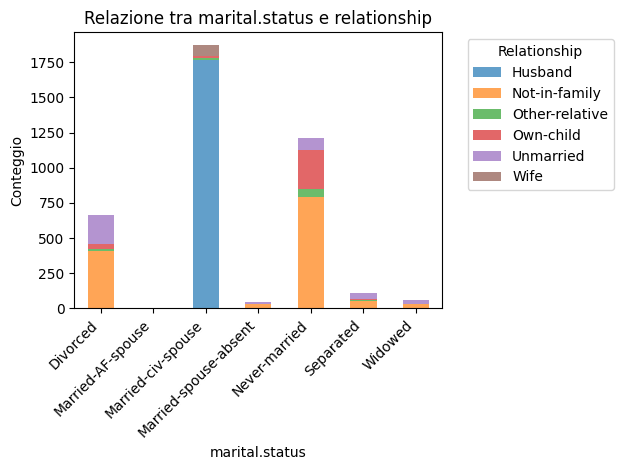

In [92]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['marital.status'], data_1['relationship'])

# Plot
plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('marital.status')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e relationship')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

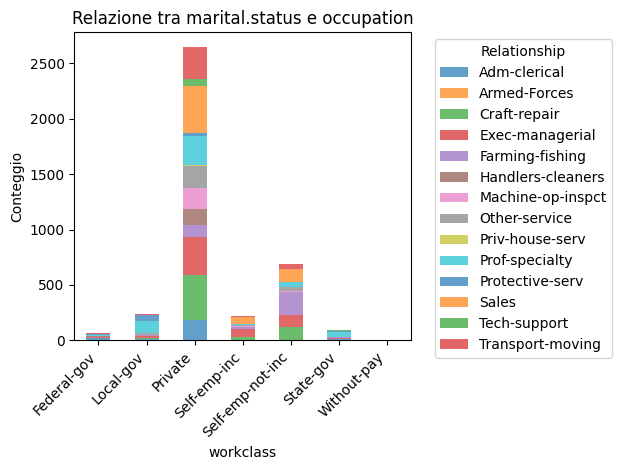

In [93]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['workclass'], data_1['occupation'])

# Plot
plt.figure(figsize=(10, 10))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('workclass')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e occupation')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [94]:
data_1 = data_1[data_1['age'] > 65]
data_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22844,66,Self-emp-not-inc,97847,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
26834,67,Private,158301,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
3770,71,Private,157909,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,2964,0,60,United-States,<=50K
15210,70,Self-emp-inc,131699,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,<=50K
19284,66,Private,29431,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


<Figure size 1000x600 with 0 Axes>

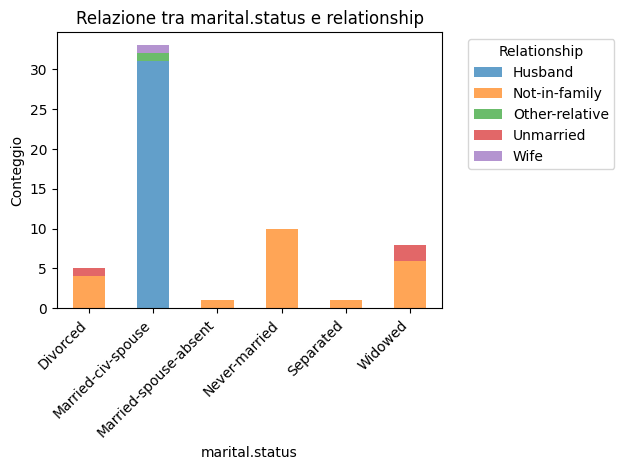

In [95]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['marital.status'], data_1['relationship'])

# Plot
plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('marital.status')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e relationship')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

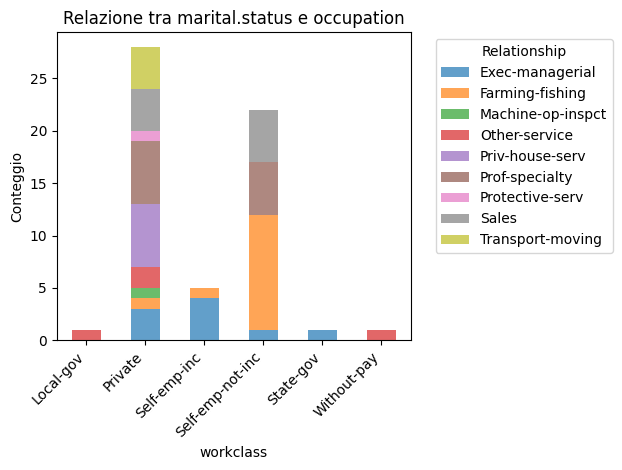

In [96]:
# Creazione della tabella di contingenza tra 'marital.status' e 'relationship'
cross_table = pd.crosstab(data_1['workclass'], data_1['occupation'])

# Plot
plt.figure(figsize=(10, 10))
cross_table.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('workclass')
plt.ylabel('Conteggio')
plt.title('Relazione tra marital.status e occupation')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## One Hot Encoding

Per la gestione delle variabili categoriche si è deciso di fare uso di un one-hot encoding. Altre strategie che richiedono l'assegnamento di una sequenza di interi alle varie categorie risultano essere poco ottimali dal momento che stabiliscono un ordinamento tra le varie categorie, un'operazione priva di senso nel nostro caso.

In [98]:
categorical_columns = new_data.select_dtypes(include=['object']).columns
new_data = pd.get_dummies(new_data, columns=categorical_columns)


## Analisi correlazione

In [107]:
new_data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
13117,34,103651,10,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
9540,54,339667,9,0,0,41,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
17176,60,223696,2,0,0,38,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
24694,49,123088,10,0,0,46,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
29475,25,189897,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [109]:
corr_matrix = new_data.corr()
corr_matrix["income_<=50K"].sort_values(ascending=False)

income_<=50K                         1.000000
marital.status_Never-married         0.319894
relationship_Own-child               0.226237
sex_Female                           0.216668
relationship_Not-in-family           0.193066
                                       ...   
age                                 -0.242017
education.num                       -0.335413
relationship_Husband                -0.401140
marital.status_Married-civ-spouse   -0.445329
income_>50K                         -1.000000
Name: income_<=50K, Length: 106, dtype: float64

In [108]:
corr_matrix = new_data.corr()
corr_matrix["income_>50K"].sort_values(ascending=False)

income_>50K                          1.000000
marital.status_Married-civ-spouse    0.445329
relationship_Husband                 0.401140
education.num                        0.335413
age                                  0.242017
                                       ...   
relationship_Not-in-family          -0.193066
sex_Female                          -0.216668
relationship_Own-child              -0.226237
marital.status_Never-married        -0.319894
income_<=50K                        -1.000000
Name: income_>50K, Length: 106, dtype: float64